In [138]:
from scipy.stats import poisson
from scipy.stats import expon, norm

import numpy as np
from numpy.random import Generator, PCG64

import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
mu, size, seed = 6, 4, 42

poisson_dist = poisson(mu = mu)
sample = poisson_dist.rvs(size = size)

sample

array([13,  5,  4,  7], dtype=int64)

In [151]:
bootstrapped_examp = np.random.choice(sample, size = len(sample), replace= True)
bootstrapped_examp

array([5, 7, 7, 5], dtype=int64)

In [157]:
# create a boostrap replicate:
def bootstrap_replicate(sample, func = np.mean):
    bootstrapped_samp = np.random.choice(sample, size = len(sample), replace= True)
    bootstrapped_replicate = func(bootstrapped_samp)
    
    return bootstrapped_replicate

In [158]:
def gen_replicates(sample, trials = 10000):
    replicates = [bootstrap_replicate(sample) for _ in range(trials)]
    return np.array(replicates)

In [159]:
print(gen_replicates(sample, 20))

[ 9.5   8.    8.75  5.75  5.25  7.    7.25  7.    5.25  4.75  7.    5.75
 11.5   5.25  4.75  9.25  7.75  4.25  7.25  7.25]


In [164]:
means_simulated = gen_replicates(sample, 100000) 

In [174]:
(means_simulated - mu)

array([ 1.25,  1.75,  2.5 , ..., -0.75,  2.5 ,  0.25])

Text(0, 0.5, 'Counts')

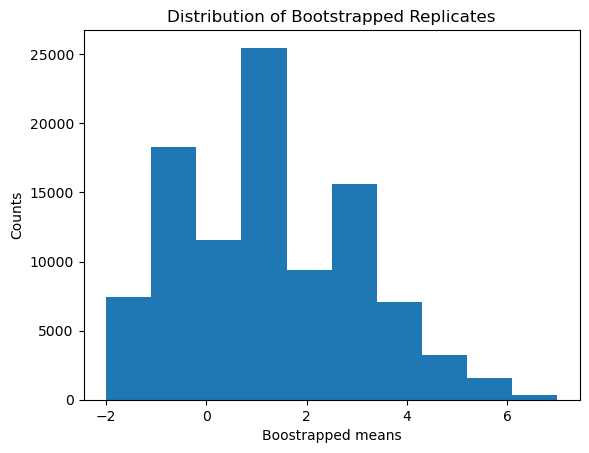

In [175]:
fig, ax = plt.subplots()
ax.hist(means_simulated - mu, bins = 10)
ax.set_title('Distribution of Bootstrapped Replicates')
ax.set_xlabel('Boostrapped means')
ax.set_ylabel('Counts')

In [176]:
mean_space = np.linspace(0,12, 1000)
norm_cdf = norm.cdf(mean_space, loc = 0, scale = mu / np.sqrt(len(sample)))

C:\Users\Praveen\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


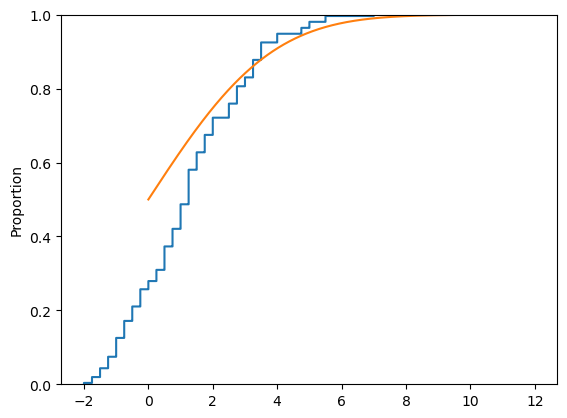

In [178]:
sns.ecdfplot(means_simulated - mu)
plt.plot(mean_space, norm_cdf)

In [ ]:
numpy_randomGen = Generator(PCG64(seed))
scipy_randomGen.random_state=numpy_randomGen
print(scipy_randomGen.rvs(n, p, size))
print(numpy_randomGen.binomial(n, p, size))